In [69]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
m = 1000
X = 2 * np.random.randn(m, 1)
Y = 12.467 + 5.3 *X + np.random.randn(m,1)

X_a = add_dummy_feature(X)

[[ 1.12849668e+00]
 [ 7.09162383e-01]
 [-7.52707015e-01]
 [-3.16766890e+00]
 [ 7.44098854e-01]
 [ 2.80874808e+00]
 [ 1.22590382e+00]
 [ 1.57200391e+00]
 [-1.14523471e+00]
 [ 5.25078412e-01]
 [ 4.49246011e+00]
 [ 9.11132790e-01]
 [-3.76975969e-01]
 [ 2.50234884e+00]
 [-1.79906305e+00]
 [-3.61261613e-01]
 [ 2.49475143e-01]
 [ 1.82753566e+00]
 [-2.76479927e+00]
 [-1.75318901e+00]
 [ 7.77787091e-01]
 [ 8.83590499e-02]
 [-1.40728444e+00]
 [ 6.96186383e-01]
 [ 1.70010103e+00]
 [ 2.66761804e+00]
 [ 9.23579516e-01]
 [ 1.49018748e+00]
 [ 3.04718790e+00]
 [ 6.93315520e-01]
 [ 7.82949241e-01]
 [-1.65151189e+00]
 [-2.52081648e-01]
 [-2.60029911e-01]
 [ 5.41072265e+00]
 [-2.99220836e+00]
 [-2.73782916e-01]
 [ 1.63258182e+00]
 [ 1.86500896e+00]
 [-1.53520680e+00]
 [ 3.26245217e-01]
 [ 2.25074310e+00]
 [-1.03948714e+00]
 [-6.17862266e-01]
 [ 2.95620138e+00]
 [-1.24585975e+00]
 [ 3.03205101e+00]
 [-1.24492796e+00]
 [ 7.48918268e-01]
 [-1.26971216e+00]
 [ 5.56855267e+00]
 [-2.86441022e-01]
 [ 1.0076148

In [70]:
result = np.linalg.inv(X_a.T @ X_a) @ X_a.T @ Y
#result = np.linalg.pinv(X_a) @ Y
#result, residuals, rank, s = np.linalg.lstsq(X_a, Y, rcond=None)
print(result)

[[12.43320557]
 [ 5.28946613]]


In [71]:
X_new = 2 * np.random.randn(200, 1)
Y_true = 12.467 + 5.3 *X_new + np.random.randn(200,1)
X_new_a = add_dummy_feature(X_new)
Y_pred = X_new_a @ result

array([[ 16.83828704],
       [  2.28130827],
       [ -1.66512047],
       [ -1.22176028],
       [ 10.12525717],
       [ 16.67260516],
       [ 26.68615048],
       [ 15.47204159],
       [ 11.86056834],
       [ 21.05153339],
       [ 14.27637815],
       [-20.70623518],
       [ 25.84910909],
       [  5.80237536],
       [ 19.03104029],
       [ -7.0866317 ],
       [ 11.28963011],
       [ 23.44867095],
       [  4.17891704],
       [  9.82457645],
       [  1.09194081],
       [  9.50296488],
       [ 12.34589474],
       [ 12.67342777],
       [ -5.85027319],
       [ 19.51053411],
       [ 17.22258083],
       [ 18.91847987],
       [  5.58317822],
       [ 11.68860185],
       [ 18.79975018],
       [  8.11409615],
       [ -2.29831439],
       [  7.12658742],
       [ 18.69315799],
       [ -4.40461013],
       [ 37.12424229],
       [ 16.37972738],
       [  7.74725421],
       [ 22.84732686],
       [ 11.8976143 ],
       [ 23.71801904],
       [ 12.15772397],
       [ -2

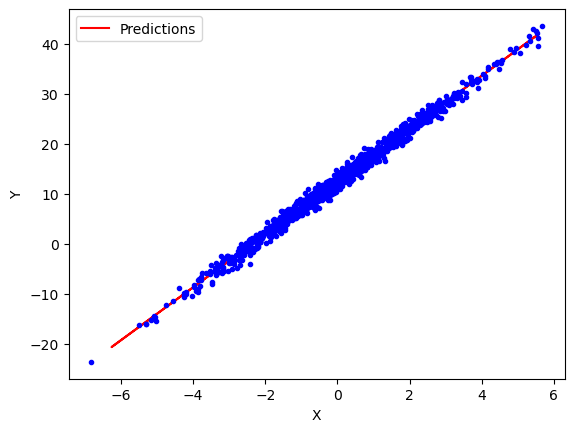

In [72]:
plt.plot(X_new, Y_pred, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [73]:
mse = np.mean((Y_true - Y_pred)**2)


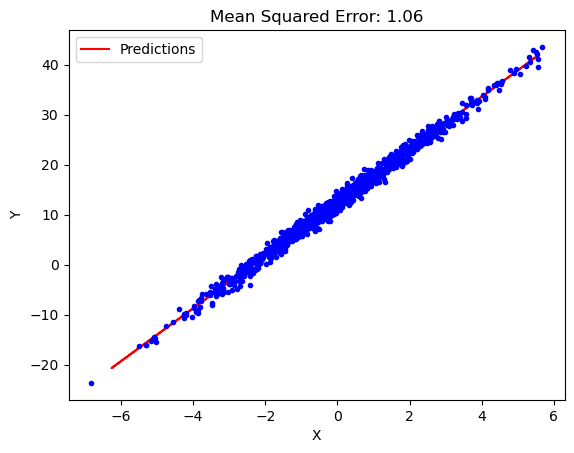

In [74]:
plt.plot(X_new, Y_pred, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Mean Squared Error: {mse:.2f}")
plt.show()

[[12.43320555]
 [ 5.28946613]]


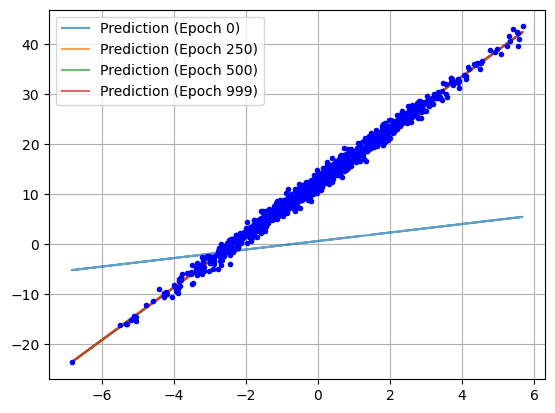

In [75]:
eta = 0.01
n_epochs = 1000
theta = np.random.randn(2,1)
n = len(X_a)



for epochs in range(n_epochs):
    mse_grad = 2 / n * X_a.T @ (X_a @ theta - Y)
    theta = theta - eta * mse_grad 
    if epochs in [0, int(n_epochs / 4), int(n_epochs / 2), n_epochs - 1]:
        plt.plot(X, X_a @ theta, label=f"Prediction (Epoch {epochs})", alpha=0.7)
        
print(theta)

plt.plot(X, Y, "b.")
plt.legend()
plt.grid()
plt.show()

In [76]:

theta = np.random.randn(2, 1)
h, j = 1, 10

def eta_f(k):
    return h / (k + j)


for epochs in range(n_epochs):
    for i in range(n):
        rand_idx = np.random.randint(n)
        xi = X_a[rand_idx: rand_idx + 1]
        yi = Y[rand_idx: rand_idx + 1]
        mse_grad = 2 * xi.T @ (xi @ theta - yi)
        eta = eta_f(epochs * n + i)
        theta = theta - eta * mse_grad


print("Final theta values:", theta)


Final theta values (Decaying LR): [[12.43539672]
 [ 5.28851379]]


In [77]:

def mse_grad_f(X, Y, theta):
    return 2 / len(X) * X.T @ (X @ theta - Y)

eta = 0.01
n_epochs = 1000 
theta = np.random.randn(2, 1)
batch_size = 50
n = len(X_a)

for epoch in range(n_epochs):
    idxs = np.random.permutation(n)
    X_shuffled = X_a[idxs]
    Y_shuffled = Y[idxs]
    
    for i in range(0, n, batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        Y_batch = Y_shuffled[i:i + batch_size]
        mse_grad = mse_grad_f(X_batch, Y_batch, theta) 
        theta = theta - eta * mse_grad

print("Final theta values (Mini-Batch Gradient Descent):", theta)


Final theta values (Mini-Batch Gradient Descent): [[12.43205704]
 [ 5.28763154]]


In [78]:
sgd = SGDRegressor(max_iter=1000,random_state=60, eta0=0.01)
sgd.fit(X, Y.ravel())
print(sgd.intercept_)
print(sgd.coef_)

[12.43425611]
[5.28449632]


In [79]:
batch_size = 100
n = len(X_a)

sgd_re = SGDRegressor(max_iter=1000, tol=1e-3)


for i in range(0, n, batch_size):
    X_batch = X_a[i:i + batch_size]
    y_batch = Y[i:i + batch_size]
    sgd_re.partial_fit(X_batch, y_batch.ravel())

accuracy = sgd_re.score(X_a, Y)
print(f"Model accuracy after partial fitting: {accuracy:.2f}")

Model accuracy after partial fitting: 0.99
